### ControlNet Demo

This demo is based on huggingface controlnet [demo](https://huggingface.co/blog/controlnet)

In [130]:
!pip install diffusers transformers xformers git+https://github.com/huggingface/accelerate.git --upgrade
!pip install opencv-contrib-python controlnet_aux --upgrade
!pip install triton --upgrade
!pip install matplotlib --upgrade

  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-a1gfdvcl
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-a1gfdvcl
  Resolved https://github.com/huggingface/accelerate.git to commit 95bffdec4326acf6a5d1c3dbaa857a26502aa265
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached triton-2.0.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.7 MB/s eta 0:00:0000:010:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 75.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 76.1 MB/s eta 0:00:00
  Using cached cycler-0

### Check the versions of the libraries

```python

In [131]:
import sys
import torch
import diffusers
import matplotlib 
print(sys.version)
print(torch.__version__)
print(diffusers.__version__)

3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]
2.0.1+cu117
0.18.1


#### Load a logo

We use the Jollibee logo.

```python

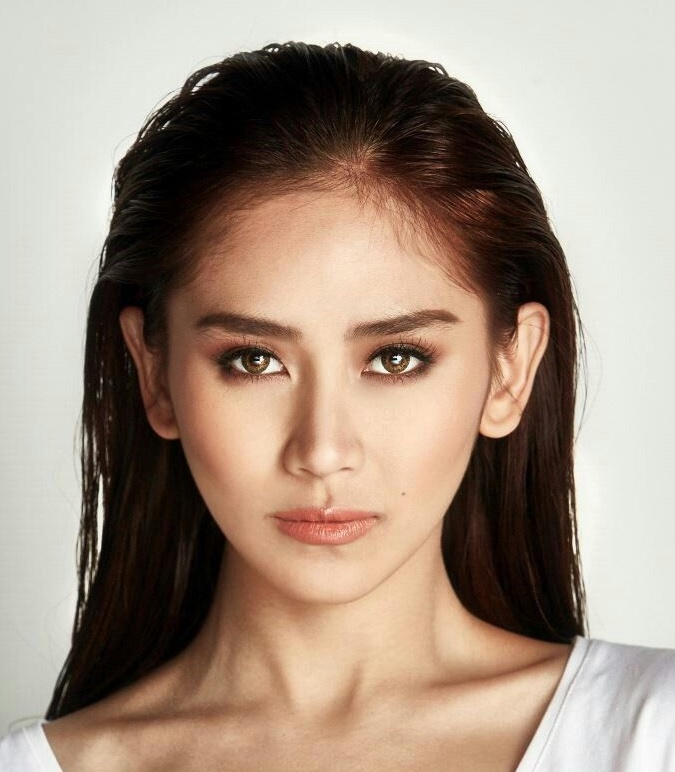

In [132]:
from diffusers.utils import load_image

image = load_image("logo/sarah.jpg")
image

In [134]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from controlnet_aux import HEDdetector

hed = HEDdetector.from_pretrained('lllyasviel/ControlNet')

image = hed(image)

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-hed", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

from diffusers import UniPCMultistepScheduler

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_xformers_memory_efficient_attention()

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-64ab732a-6baa9ebb568c9a7d19a12105;4595e5ea-953d-4366-85b9-07d24c982bc8)

Entry Not Found for url: https://huggingface.co/lllyasviel/ControlNet/resolve/main/ControlNetHED.pth.

### Run the Stable Diffusion with ControlNet 

  0%|          | 0/20 [00:00<?, ?it/s]

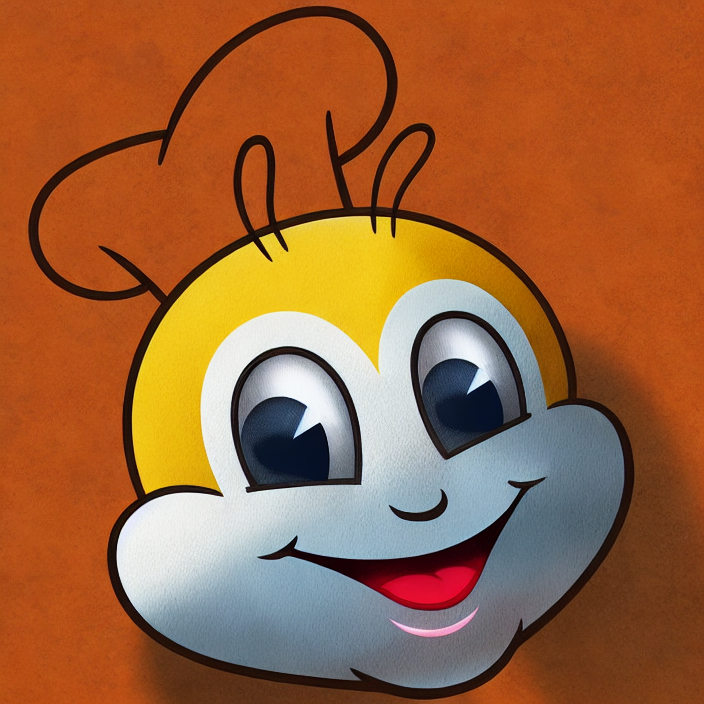

In [125]:
prompt = ["old beautiful woman, photorealistic"]
generator = torch.Generator(device="cpu").manual_seed(0)

output = pipe(
    prompt,
    image,
    negative_prompt=["monochrome, lowres,  worst quality, low quality, smooth"] ,
    num_inference_steps=20,
    generator=generator,
)

output.images[0]